# **Exploratory Data Analysis (EDA) on Highest Gross Movies Data** #

In [1]:
import pandas as pd
import numpy as np

# Initial Analysis #

In [2]:
dt_frame = pd.read_csv("../input/top-1000-highest-grossing-movies/Highest Holywood Grossing Movies.csv")

print(str.format("Number of data points: {0}, number of features: {1}",dt_frame.shape[0], dt_frame.shape[1]))
print('\n'+'-'*50+'\n')
print(str.format("List of features: {0}",dt_frame.columns))

dt_frame.head(3)

Number of data points: 918, number of features: 11

--------------------------------------------------

List of features: Index(['Unnamed: 0', 'Title', 'Movie Info', 'Distributor', 'Release Date',
       'Domestic Sales (in $)', 'International Sales (in $)',
       'World Sales (in $)', 'Genre', 'Movie Runtime', 'License'],
      dtype='object')


,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13


In [3]:
print(str.format("Records where the World sales does not matches with the sales of Domestic and International sales: {0}", 
                (dt_frame[dt_frame['World Sales (in $)'] != (dt_frame['Domestic Sales (in $)'] + dt_frame['International Sales (in $)'])].shape[0])))

Records where the World sales does not matches with the sales of Domestic and International sales: 29


In [4]:
dt_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  918 non-null    int64 
 1   Title                       918 non-null    object
 2   Movie Info                  918 non-null    object
 3   Distributor                 918 non-null    object
 4   Release Date                800 non-null    object
 5   Domestic Sales (in $)       918 non-null    int64 
 6   International Sales (in $)  918 non-null    int64 
 7   World Sales (in $)          918 non-null    int64 
 8   Genre                       918 non-null    object
 9   Movie Runtime               918 non-null    object
 10  License                     744 non-null    object
dtypes: int64(4), object(7)
memory usage: 79.0+ KB


In [5]:
dt_frame[dt_frame.isna().any(axis=1)]

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN
5,5,Spider-Man: No Way Home (2021),"With Spider-Man's identity now revealed, Peter...",Sony Pictures Entertainment (SPE),NaN,675813257,868642706,1544455963,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 28 min,NaN
10,10,Incredibles 2 (2018),The Incredibles family takes on a new mission ...,Walt Disney Studios Motion Pictures,NaN,608581744,634507500,1243089244,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 hr 58 min,NaN
16,16,Finding Dory (2016),Friendly but forgetful blue tang Dory begins a...,Walt Disney Studios Motion Pictures,NaN,486295561,542275381,1028570942,"['Adventure', 'Animation', 'Comedy', 'Family']",1 hr 37 min,NaN
...,...,...,...,...,...,...,...,...,...,...,...
891,891,Mr. Holland's Opus (1995),A frustrated composer finds fulfillment as a h...,Walt Disney Studios Motion Pictures,NaN,82569971,23700000,106269971,"['Drama', 'Music']",2 hr 23 min,NaN
896,896,Bridge to Terabithia (2007),A preteen's life turns upside down when he bef...,Walt Disney Studios Motion Pictures,NaN,82272442,55314621,137587063,"['Drama', 'Family', 'Fantasy']",1 hr 36 min,NaN
903,903,MASH (1970),The staff of a Korean War field hospital use h...,Twentieth Century Fox,NaN,81600000,81600000,81600000,"['Comedy', 'Drama', 'War']",1 hr 56 min,NaN
912,912,Congo (1995),When an expedition to the African Congo ends i...,Paramount Pictures,NaN,81022101,71000000,152022101,"['Action', 'Adventure', 'Mystery', 'Sci-Fi']",1 hr 49 min,NaN


In [6]:
#Calculate percenatge of null value in the respective columns.
missing_columns = dt_frame.isnull().sum() / len(dt_frame) * 100
pd.DataFrame({'Missing Values %': missing_columns})

,Missing Values %
Unnamed: 0,0.000000
Title,0.000000
Movie Info,0.000000
Distributor,0.000000
Release Date,12.854031
Domestic Sales (in $),0.000000
International Sales (in $),0.000000
World Sales (in $),0.000000
Genre,0.000000
Movie Runtime,0.000000


In [7]:
# Number of unique movie Distributor
dt_frame.sort_values("Distributor", inplace = True)
dt_frame.Distributor.unique()

array(['20th Century Studios', 'Artisan Entertainment',
       'Columbia Pictures', 'Dimension Films', 'DreamWorks',
       'DreamWorks Distribution', 'FilmDistrict', 'Focus Features',
       'Fox Searchlight Pictures', 'IFC Films', 'Lionsgate',
       'Metro-Goldwyn-Mayer (MGM)', 'Miramax', 'New Line Cinema',
       'Newmarket Films', 'Orion Pictures', 'Paramount Pictures',
       'Relativity Media', 'Revolution Studios', 'Roadside Attractions',
       'STX Entertainment', 'Screen Gems', 'Sony Pictures Classics',
       'Sony Pictures Entertainment (SPE)', 'Summit Entertainment',
       'The Weinstein Company', 'TriStar Pictures',
       'Twentieth Century Fox', 'USA Films', 'United Artists',
       'United Artists Releasing', 'Universal Pictures',
       'Walt Disney Studios Motion Pictures', 'Warner Bros.'],
      dtype=object)

In [8]:
dt_frame[dt_frame['Distributor'] == 'DreamWorks Distribution'].head(2)

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
179,179,Saving Private Ryan (1998),"Following the Normandy Landings, a group of U....",DreamWorks Distribution,"July 24, 1998",217049603,265300000,482349603,"['Drama', 'War']",2 hr 49 min,R
701,701,Collateral (2004),A cab driver finds himself the hostage of an e...,DreamWorks Distribution,"August 5, 2004",101005703,119234222,220239925,"['Action', 'Crime', 'Drama', 'Thriller']",2 hr,R


In [9]:
dt_frame[dt_frame['Distributor'] == 'DreamWorks'].head(2)

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
72,72,Shrek the Third (2007),Reluctantly designated as the heir to the land...,DreamWorks,"May 17, 2007",322719944,490647436,813367380,"['Adventure', 'Animation', 'Comedy', 'Family',...",1 hr 33 min,PG
74,74,Transformers (2007),An ancient struggle between two Cybertronian r...,DreamWorks,"June 28, 2007",319246193,390463587,709709780,"['Action', 'Adventure', 'Sci-Fi']",2 hr 24 min,PG-13


In [10]:
dt_frame.Genre.apply(type).head()

529    <class 'str'>
411    <class 'str'>
408    <class 'str'>
137    <class 'str'>
519    <class 'str'>
Name: Genre, dtype: object

# Observation of initial analysis: #
1. 'Unnamed: 0' feature is an index column and can be droped. 'Movie Info' feature can be droped, this feature tell us brief about the story of the movie and is not much relevent.

2. Renaming features will be lot easier when we need to refer those column name dataframe
    - Rename features to remove spaces. 
    - Remove **Dollar** sign from all sales features. Since all the 'Sales' are in Dollar we can remove '$' from the column name. 
    
3. 'Genre' feature is string representation of a list. So need to convert it in to list and convert them to wide format for easier analysis

4. Seperate 'Release Date' feature as seperate feature as 'Year','Month'.

5. In 'Title' feature year in which the moview was release is added. Since we already have that same detail in the 'Release Date' feature column we can remove those from the 'Title'.

6. 'World Sales' feature is the total sales of the movie. So they should be sum of 'Domestic Sales' and 'International Sales' 
        i.e
            World Sales = Domestic Sales + International Sales    
    Found 29 records where the 'World Sales' does not matches with the sum of 'Domestic' and 'International' sales figure. Need to fix those records.

7. 'Movie Runtime' is in format of hours and minute. Convert them to minute.

8. Same Distributor different naming convention. 
    - 'DreamWorks Distribution' and 'DreamWorks' are same. 
    - 'United Artists' and 'United Artists Releasing' are same.
    - 'Sony Pictures Entertainment (SPE)' is parent company of 'Sony Pictures Classic'. So we can consider them as single company as 'Sony Pictures Entertainment (SPE)'

9. There are 18.8% of records having null value in 'License'. We can either replace those values based on the 'Genre' type of the moview.

10. There are 12.85% records having null in 'Release Date' feature. Since this is an importance feature and we can not simply drop those records. We could get the Year in which moview was release by extracting the year from the 'Title' feature. But we also need the month in which the moview was release, to understand if there is any relationship between the Month a movies are release and there Sales. 
*For these missing values in 'Release Date' feature, have searched and assigned the right release dates for those moviews and created new file '../input/grossing-movies-moviesmissing-release-date-add/Highest_Holywood_Grossing_Movies_v2.csv' that has no **null** values in that column. For futher analysis will be using this file only*

# Data Cleaning
Will clean all points that we have observed in the initial analysis.

In [11]:
dt_frame = pd.read_csv("../input/grossing-movies-moviesmissing-release-date-add/Highest_Holywood_Grossing_Movies_v2.csv")

In [12]:
# Drop 'Unnamed: 0' and 'Movie Info' feature
dt_frame.drop(['Unnamed: 0','Movie Info'], axis=1, inplace = True)

In [13]:
# Rename features, will be lot easier when we need to refer those column name for any analisies.
dt_frame.rename(columns={"Release Date": "Release_Date", 
                         "Domestic Sales (in $)": "Domestic_Sales",
                         "International Sales (in $)": "International_Sales",
                         "World Sales (in $)": "World_Sales",
                         "Movie Runtime": "Duration_min",
                        } 
                , inplace = True )

In [14]:
# Records where the 'World Sales' does not matches with the sum of 'Domestic' and 'International' sales figure
Index = dt_frame[dt_frame['World_Sales'] != (dt_frame['Domestic_Sales'] + dt_frame['International_Sales'])].index
dt_frame.iloc[Index,5] = dt_frame.iloc[Index,3] + dt_frame.iloc[Index,4]

#Verify if the Sales figure is fixed for World_Sales
print(str.format("Number of records having incorrect world sales figure: {0}",dt_frame[dt_frame['World_Sales'] != (dt_frame['Domestic_Sales'] + dt_frame['International_Sales'])].shape[0]))

Number of records having incorrect world sales figure: 0


In [15]:
# 'Genre' feature. Convert it to long format
import ast 
dt_frame['index'] = dt_frame['Genre'].apply(ast.literal_eval)
dt_temp = dt_frame.explode('index', ignore_index = True)
dt_temp['Values'] = 1
genre_series = dt_frame['index']

pivt = dt_temp.pivot_table(index=['Title', 'Distributor', 'Genre','Domestic_Sales', 'International_Sales','World_Sales', 'Duration_min', 'License', 'Release_Date'], 
                           columns='index', 
                           values='Values',
                           fill_value=0)
dt_frame = pivt.reset_index()
dt_frame.index.name = ""
dt_frame.rename(columns={
                         'Action': 'Genre_Action', 'Adventure': 'Genre_Adventure', 'Animation': 'Genre_Animation',
                         'Biography' : 'Genre_Biography',
                         'Comedy' : 'Genre_Comedy', 'Crime' : 'Genre_Crime', 
                         'Documentary' : 'Genre_Documentary', 'Drama': 'Genre_Drama', 
                         'Family': 'Genre_Family', 'Fantasy': 'Genre_Fantasy',
                         'History': 'Genre_History', 'Horror': 'Genre_Horror', 
                         'Music':'Genre_Music', 'Musical':'Genre_Musical', 'Mystery':'Genre_Mystery', 
                         'Romance':'Genre_Romance', 
                         'Sci-Fi':'Genre_Sci-Fi', 'Sport':'Genre_Sport', 
                         'Thriller':'Genre_Thriller', 
                         'War':'Genre_War', 'Western':'Genre_Western'                         
                        } 
                    , inplace = True )
                    
dt_frame.Genre = genre_series
dt_frame.head()

index,Title,Distributor,Genre,Domestic_Sales,International_Sales,World_Sales,Duration_min,License,Release_Date,Genre_Action,...,Genre_Horror,Genre_Music,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western
,,,,,,,,,,,,,,,,,,,,,
0,"10,000 BC (2008)",Warner Bros.,"[Action, Adventure, Sci-Fi]",94784201,175000000,269784201,1 hr 49 min,PG-13,"March 5, 2008",1,...,0,0,0,0,0,0,0,0,0,0
1,1917 (2019),Universal Pictures,"[Action, Adventure, Drama, Sci-Fi]",159227644,225691745,384919389,1 hr 59 min,R,"December 25, 2019",1,...,0,0,0,0,0,0,0,0,1,0
2,2 Fast 2 Furious (2003),Universal Pictures,"[Action, Adventure, Fantasy, Sci-Fi]",127154901,109195760,236350661,1 hr 47 min,PG-13,"June 5, 2003",1,...,0,0,0,0,0,0,0,1,0,0
3,2012 (2009),Sony Pictures Entertainment (SPE),"[Action, Adventure, Sci-Fi]",166112167,625105659,791217826,2 hr 38 min,PG-13,"November 11, 2009",1,...,0,0,0,0,0,1,0,0,0,0
4,21 (2008),Sony Pictures Entertainment (SPE),"[Action, Adventure, Sci-Fi]",81159365,78649005,159808370,2 hr 3 min,PG-13,"March 28, 2008",0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
# Seperate 'Release Date' feature to seperate columns 'Year', 'Month'

dt_frame.Release_Date = pd.to_datetime(dt_frame.Release_Date,format='%B %d, %Y')
dt_frame['Release_Year'] = pd.DatetimeIndex(dt_frame.Release_Date).year 
dt_frame['Release_Month'] = pd.DatetimeIndex(dt_frame.Release_Date).month 
#dt_frame['Release_Day'] = pd.DatetimeIndex(dt_frame.Release_Date).day
dt_frame.drop(['Release_Date'], axis=1, inplace = True)

In [17]:
# Remove release year for Title feature
import re
dt_frame.Title = dt_frame.Title.apply(lambda x: re.sub(r'\(\d+\)','',x))

In [18]:
# Convert 'Movie Runtime' into minute
"""
Steps followed are:
    1. Split the Duration columns into Hr and min. 
    2. Since some of the moview do not have min value, will set those to 0
    3. Convert the splited output to numeric.
    4. Convert Hr to min by multiplying Hr * 60. Then add that with min to get the duration in mins   
"""    
dt_frame.Duration_min = ((dt_frame.Duration_min.str.split(expand=True).iloc[:,[0,2]]).fillna(0).apply(pd.to_numeric)).apply(lambda x: (x[0]*60) + x[2],axis =1)
dt_frame.head(1)

index,Title,Distributor,Genre,Domestic_Sales,International_Sales,World_Sales,Duration_min,License,Genre_Action,Genre_Adventure,...,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Release_Year,Release_Month
,,,,,,,,,,,,,,,,,,,,,
0,"10,000 BC",Warner Bros.,"[Action, Adventure, Sci-Fi]",94784201,175000000,269784201,109,PG-13,1,1,...,0,0,0,0,0,0,0,0,2008,3


In [19]:
# Set same names for Distributor 
    
dt_frame.sort_values("Distributor", inplace = True)
dt_frame.reset_index(drop=True, inplace=True)
dt_frame.loc[dt_frame.Distributor == 'DreamWorks Distribution', 'Distributor'] = 'DreamWorks' 
dt_frame.loc[dt_frame.Distributor == 'United Artists Releasing', 'Distributor'] = 'United Artists' 
dt_frame.loc[dt_frame.Distributor == 'Sony Pictures Classics', 'Distributor'] = 'Sony Pictures Entertainment' 

dt_frame.loc[dt_frame.Distributor == 'Sony Pictures Entertainment (SPE)', 'Distributor'] = 'Sony Pictures Entertainment'
dt_frame.loc[dt_frame.Distributor == 'Metro-Goldwyn-Mayer (MGM)', 'Distributor'] = 'Metro-Goldwyn-Mayer'
dt_frame.loc[dt_frame.Distributor == 'Walt Disney Studios Motion Pictures', 'Distributor'] = 'Walt Disney Studios'

dt_frame.Distributor.unique()

array(['Artisan Entertainment', 'Columbia Pictures', 'Dimension Films',
       'DreamWorks', 'FilmDistrict', 'Focus Features',
       'Fox Searchlight Pictures', 'IFC Films', 'Lionsgate',
       'Metro-Goldwyn-Mayer', 'Miramax', 'New Line Cinema',
       'Newmarket Films', 'Paramount Pictures', 'Relativity Media',
       'Revolution Studios', 'Roadside Attractions', 'STX Entertainment',
       'Screen Gems', 'Sony Pictures Entertainment',
       'Summit Entertainment', 'The Weinstein Company',
       'TriStar Pictures', 'Twentieth Century Fox', 'United Artists',
       'Universal Pictures', 'Walt Disney Studios', 'Warner Bros.'],
      dtype=object)

In [20]:
# Handel null value in License feature. 
# Here I am assuming that license issued for the similar 'Genre' can be applied to missing rows that has same 'Genre'
unique_genre_license_null_records = dt_frame[dt_frame.isna().any(axis=1)].Genre.unique()
null_index_rows = dt_frame[dt_frame.isna().any(axis=1)].index
filter_col = [col for col in dt_frame if col.startswith('Genre_')]
filter_col += ['License']
#groupby_df = dt_frame.dropna().groupby(by=['Genre','License'])
groupby_df = dt_frame.dropna().groupby(by=filter_col)

gb = groupby_df.groups
dict_genre_license= {}
for key in gb.keys():
    dict_genre_license[key[0]] = key[1]

dt_frame.iloc[null_index_rows,7] = dt_frame.iloc[null_index_rows,5].apply(lambda x: dict_genre_license[x] if x in dict_genre_license else np.nan)

#if null value still exists in the 'Licenes' feature drop those records
dt_frame.dropna(inplace = True)

print(str.format("Number of records left after drop: {0}", dt_frame.shape[0]))

Number of records left after drop: 745


In [21]:
#Final Output
dt_frame.sort_values(['Distributor','Release_Year'], inplace = True, ascending = False)
dt_frame.reset_index(drop=True, inplace=True)
dt_frame.head(5)

index,Title,Distributor,Genre,Domestic_Sales,International_Sales,World_Sales,Duration_min,License,Genre_Action,Genre_Adventure,...,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Release_Year,Release_Month
0,Birds of Prey,Warner Bros.,"[Action, Adventure]",84158461,117700000,201858461,109,R,1,1,...,0,0,0,0,0,0,0,0,2020,2
1,Joker,Warner Bros.,"[Adventure, Comedy, Crime, Family]",335451311,738968073,1074419384,122,R,0,0,...,0,0,0,0,0,1,0,0,2019,10
2,It Chapter Two,Warner Bros.,"[Horror, Mystery, Thriller]",211593228,261500000,473093228,169,R,0,0,...,0,0,0,0,0,0,0,0,2019,9
3,Shazam!,Warner Bros.,"[Action, Adventure, Fantasy, Thriller]",140371656,225600000,365971656,132,PG-13,1,1,...,0,0,0,0,0,0,0,0,2019,4
4,Pokémon Detective Pikachu,Warner Bros.,"[Drama, Romance]",144105346,289409488,433514834,104,PG,1,1,...,0,1,0,1,0,0,0,0,2019,5


In [22]:
dt_frame.columns

Index(['Title', 'Distributor', 'Genre', 'Domestic_Sales',
       'International_Sales', 'World_Sales', 'Duration_min', 'License',
       'Genre_Action', 'Genre_Adventure', 'Genre_Animation', 'Genre_Biography',
       'Genre_Comedy', 'Genre_Crime', 'Genre_Documentary', 'Genre_Drama',
       'Genre_Family', 'Genre_Fantasy', 'Genre_History', 'Genre_Horror',
       'Genre_Music', 'Genre_Musical', 'Genre_Mystery', 'Genre_Romance',
       'Genre_Sci-Fi', 'Genre_Sport', 'Genre_Thriller', 'Genre_War',
       'Genre_Western', 'Release_Year', 'Release_Month'],
      dtype='object', name='index')

In [23]:
dt_frame.Release_Year.min()

1977

In [24]:
dt_frame.Release_Year.max()

2021

# Summary:

1. In original data there where 173 records that had null value in 'License' feature. We had to dropped 55 records since we where not able to find any past moview licenses with same genre. Now we have 863 unique records.
2. Add new columns that might help in out analysis. Like now we have seperate column for each Genre type.
3. We have movies records from year 1953 to 2021.

# Exploratory Data Analysis (EDA)  #

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
sns.set_style("whitegrid")
pd.set_option('display.max_rows', None)

In [27]:
dt_frame[['Domestic_Sales','International_Sales','World_Sales']] = dt_frame[['Domestic_Sales','International_Sales','World_Sales']].div(1000000)

In [28]:
dt_frame.describe()

index,Domestic_Sales,International_Sales,World_Sales,Duration_min,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,...,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Release_Year,Release_Month
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.00000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,170.124151,236.860401,406.984553,117.190604,0.461745,0.456376,0.132886,0.049664,0.41745,0.153020,...,0.044295,0.095302,0.159732,0.255034,0.029530,0.257718,0.028188,0.012081,2007.962416,7.193289
std,105.381707,219.998353,310.287215,20.874398,0.498869,0.498428,0.339679,0.217397,0.49347,0.360249,...,0.205889,0.293829,0.366603,0.436173,0.169401,0.437672,0.165621,0.109319,7.800688,3.209564
min,80.360843,2.450488,86.086881,78.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1977.000000,1.000000
25%,102.561004,94.700000,207.305509,101.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2003.000000,5.000000
50%,133.668525,171.401870,312.296056,116.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,7.000000
75%,195.330621,304.203888,487.287646,130.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2014.000000,10.000000
max,936.662225,2086.738578,2847.246203,201.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2021.000000,12.000000


**Question 1**: How are the sales of each distributer per year?

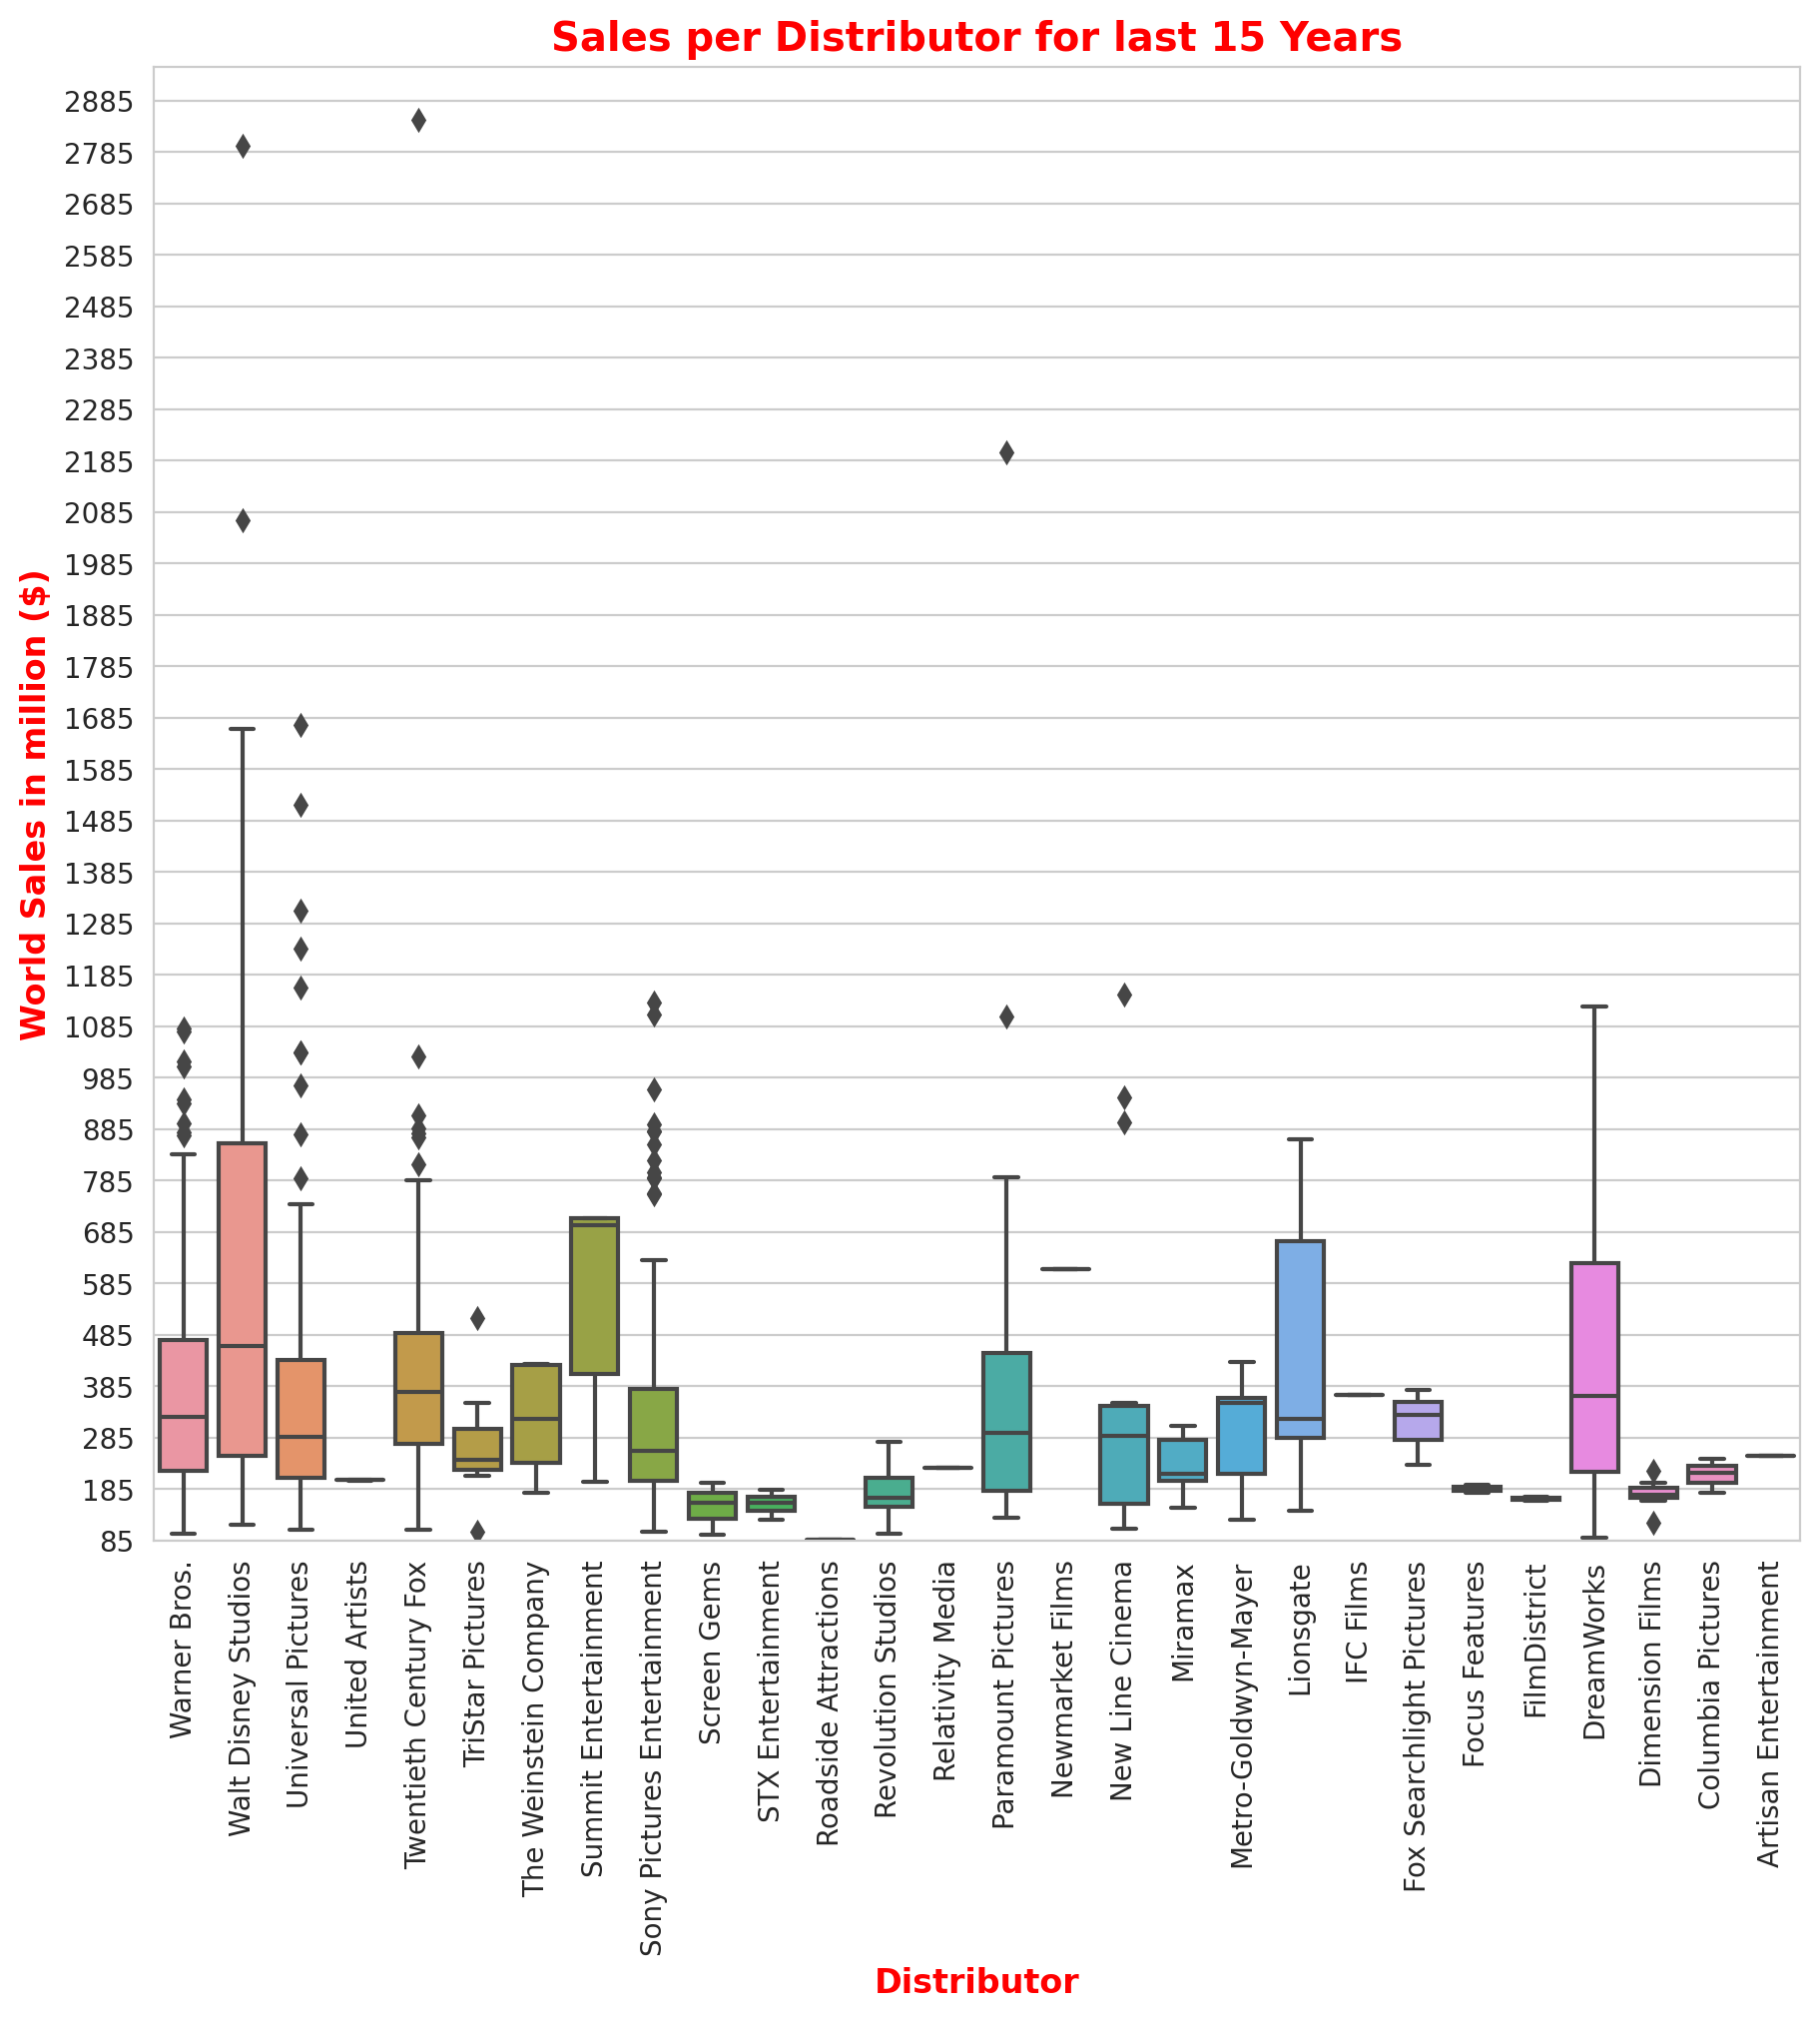

In [29]:
fig_WS = plt.figure(num = 1, 
                    figsize = (9,10), 
                    dpi = 200, 
                    clear = True,
                    constrained_layout =  True
                    )

ax = sns.boxplot(y = 'World_Sales', 
                x = 'Distributor', 
                data = dt_frame)

ax.set_title("Sales per Distributor for last 15 Years", 
             loc='center' ,
             fontfamily = 'sans-serif',
             fontsize = 'x-large',
             fontweight = 'bold',
             color = 'red'
             )

#X- Axis
ax.set_xticklabels(ax.get_xticklabels(), 
                   rotation = 90                   
                   )

ax.set_xlabel("Distributor",
              fontfamily = 'sans-serif',
              fontsize = 'large',
              fontweight = 'bold',
              color = 'red'
             )

#Y- Axis
ylable = np.arange(85,2950,100)
ax.set_yticks(ylable)
ax.set_ylabel("World Sales in million ($)",
              fontfamily = 'sans-serif',
              fontsize = 'large',
              fontweight = 'bold',
              color = 'red'
            )
ax.set_ylim((85, 2950))

plt.show()
fig_WS.clf()

**Observation:**
1. We can say there are only few distributor movies have eared more then 500 million in last 15 year.
2. In initial observation it looked like records has outlier. But it is possible that those are not outlier, since it is possible that movie actually made those sales world wide.

**Question 2:** Is there any relationship between the month these movies where release to the sales?
It is possible that if the movie are release during holidays time they are like to earn more.

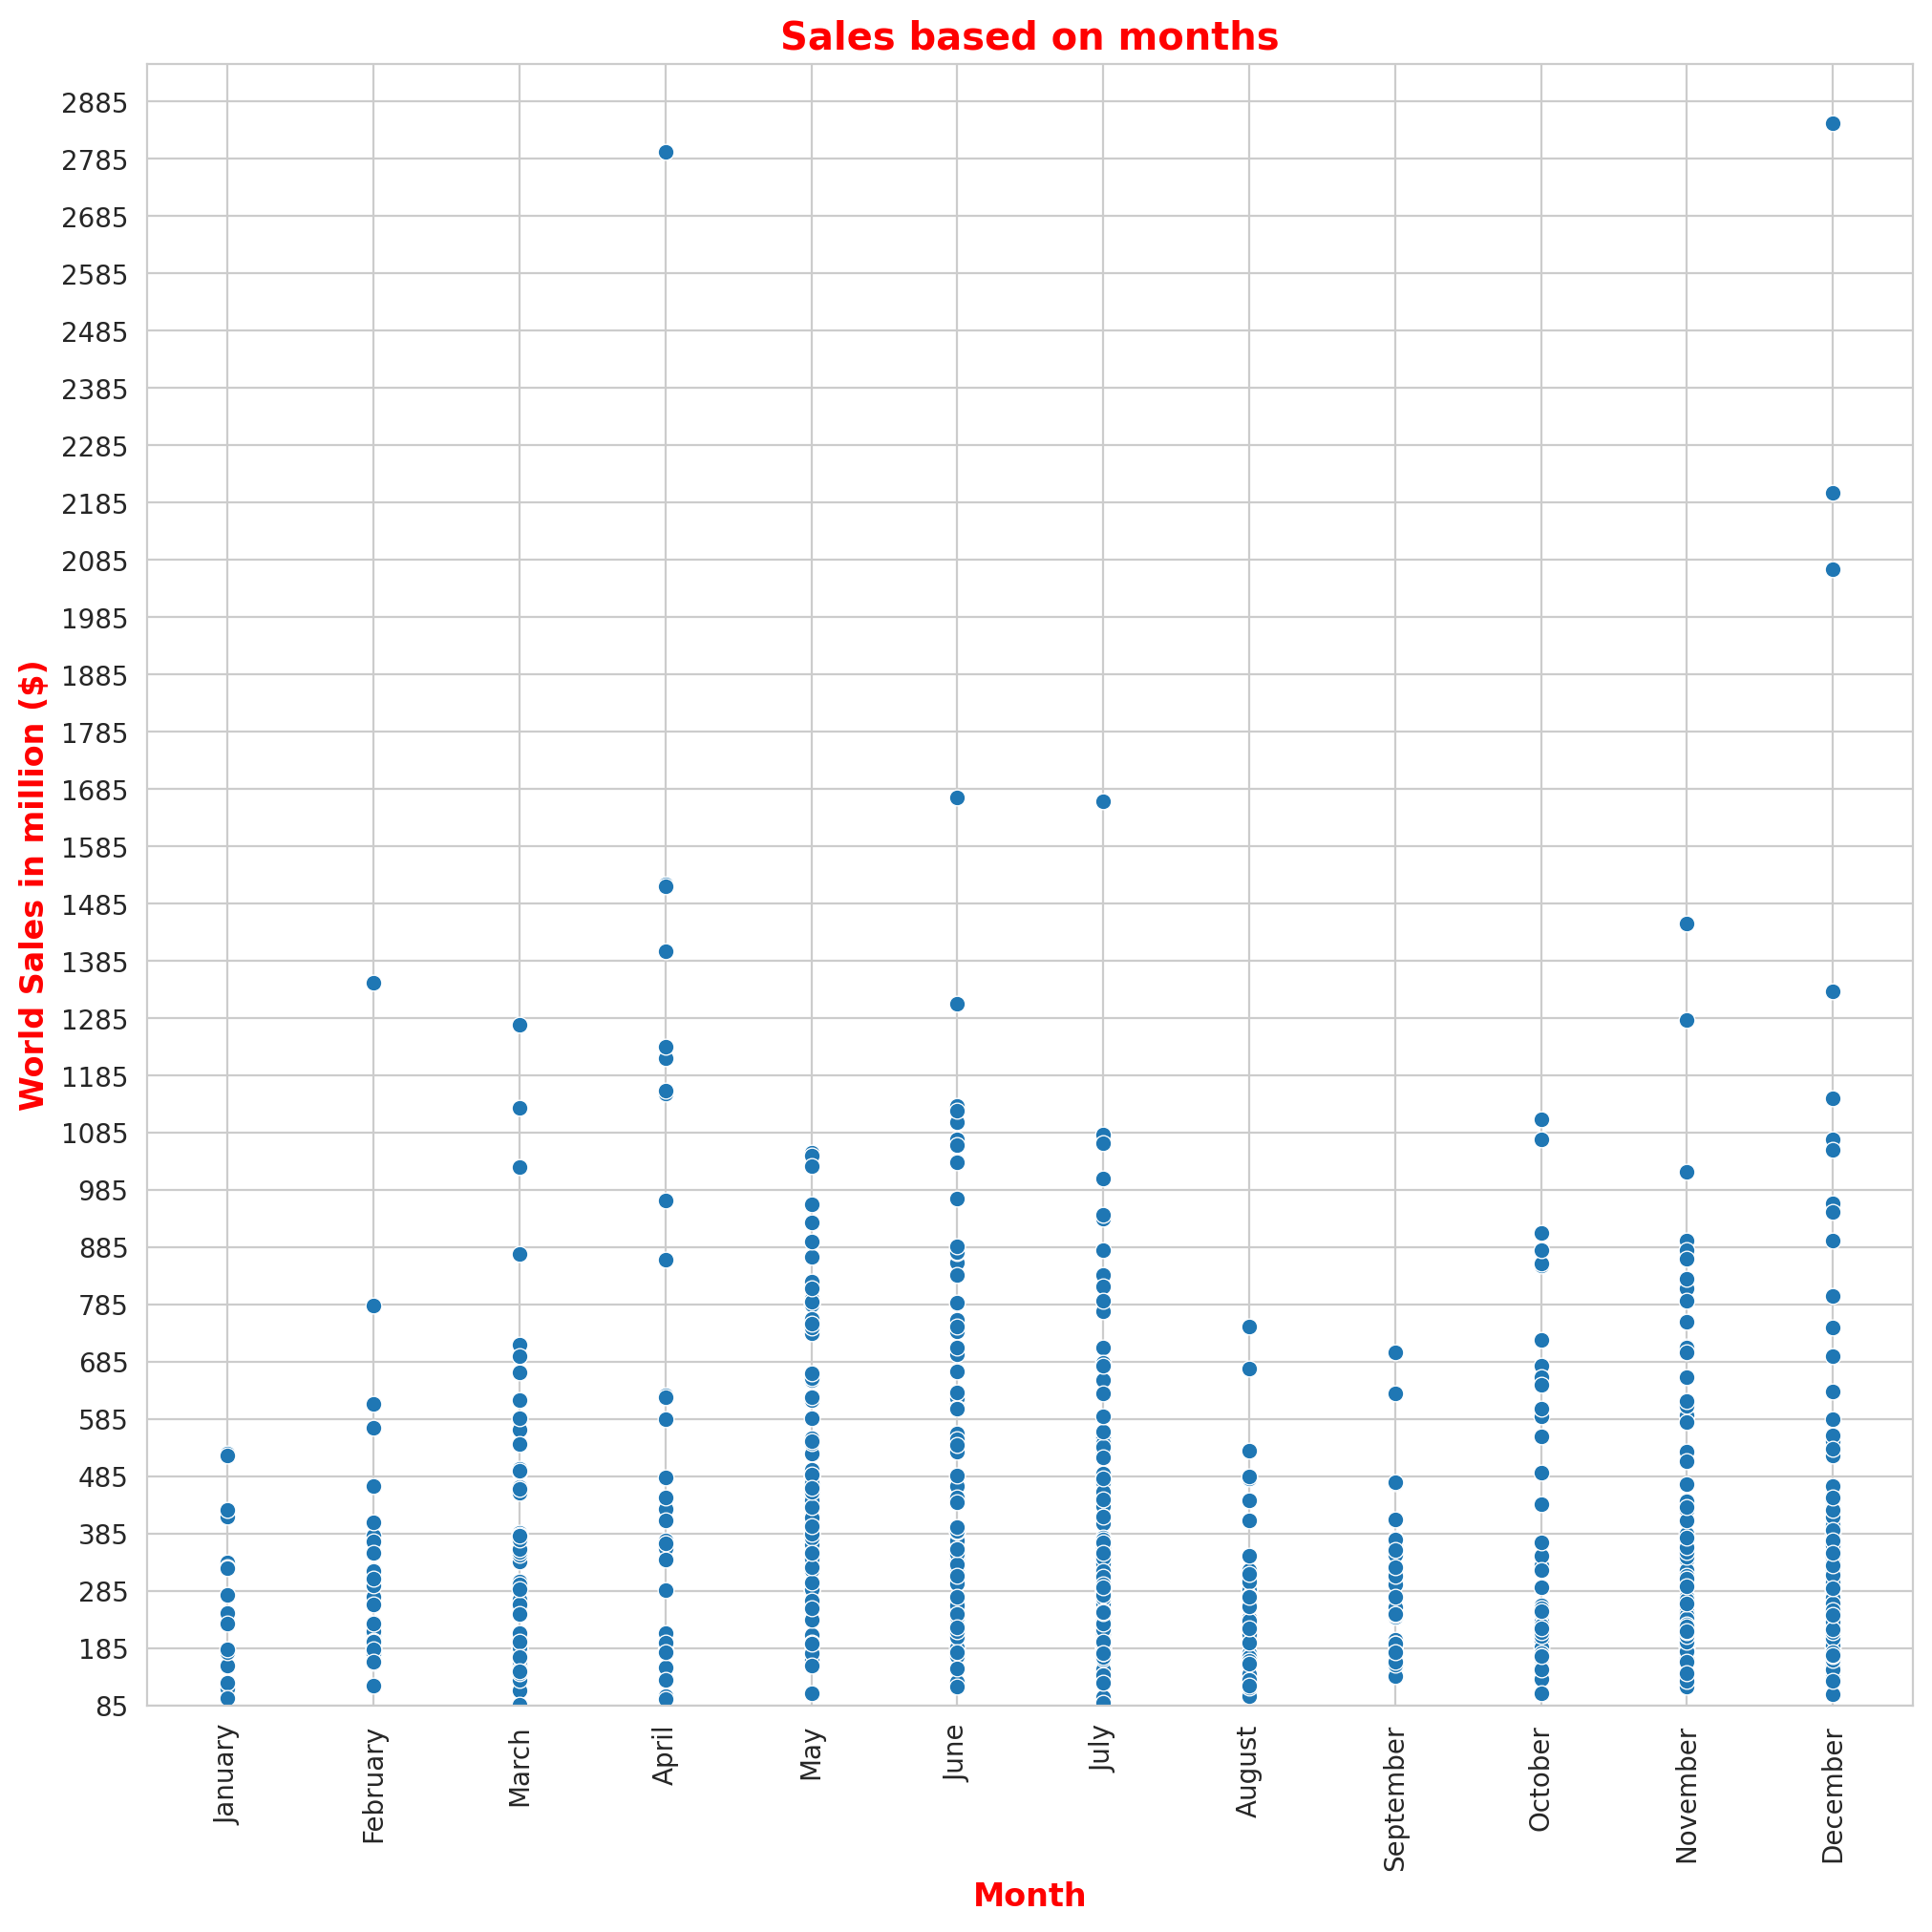

In [30]:
import datetime
fig_WS_Month = plt.figure(num = 2, 
                    figsize = (10,10), 
                    dpi = 200, 
                    clear = True,
                    constrained_layout =  True
                    )

months_choices = []
for i in range(1,13):
    months_choices.append(datetime.date(2022, i, 1).strftime('%B'))

ax = sns.scatterplot(x = 'Release_Month', 
                     y = 'World_Sales', 
                     data = dt_frame
                    )

#Title
ax.set_title("Sales based on months", 
             loc='center' ,
             fontfamily = 'sans-serif',
             fontsize = 'x-large',
             fontweight = 'bold',
             color = 'red'
             )

#X- Axis
ax.set_xticks(range(1,13))
ax.set_xticklabels(months_choices,
                   rotation = 90)

ax.set_xlabel("Month",
              fontfamily = 'sans-serif',
              fontsize = 'large',
              fontweight = 'bold',
              color = 'red'
             )

#Y- Axis
ylable = np.arange(85,2950,100)
ax.set_yticks(ylable)
ax.set_ylabel("World Sales in million ($)",
              fontfamily = 'sans-serif',
              fontsize = 'large',
              fontweight = 'bold',
              color = 'red'
            )
ax.set_ylim((85, 2950))

plt.show()
fig_WS_Month.clf()

In [31]:
dt_frame.groupby(by = ['Distributor','Release_Month']).size()

Distributor                  Release_Month
Artisan Entertainment        7                 1
Columbia Pictures            7                 1
                             11                1
                             12                1
Dimension Films              2                 1
                             4                 1
                             7                 1
                             8                 1
                             10                1
                             12                2
DreamWorks                   2                 1
                             3                 3
                             5                 6
                             6                 5
                             7                 5
                             8                 2
                             9                 3
                             10                5
                             11                2
                          

**Observation:**
1. Many moview are release in month of May, June, July, November, December. 

**Question 3:** Which year had highest number of moview that had highest gross sales?

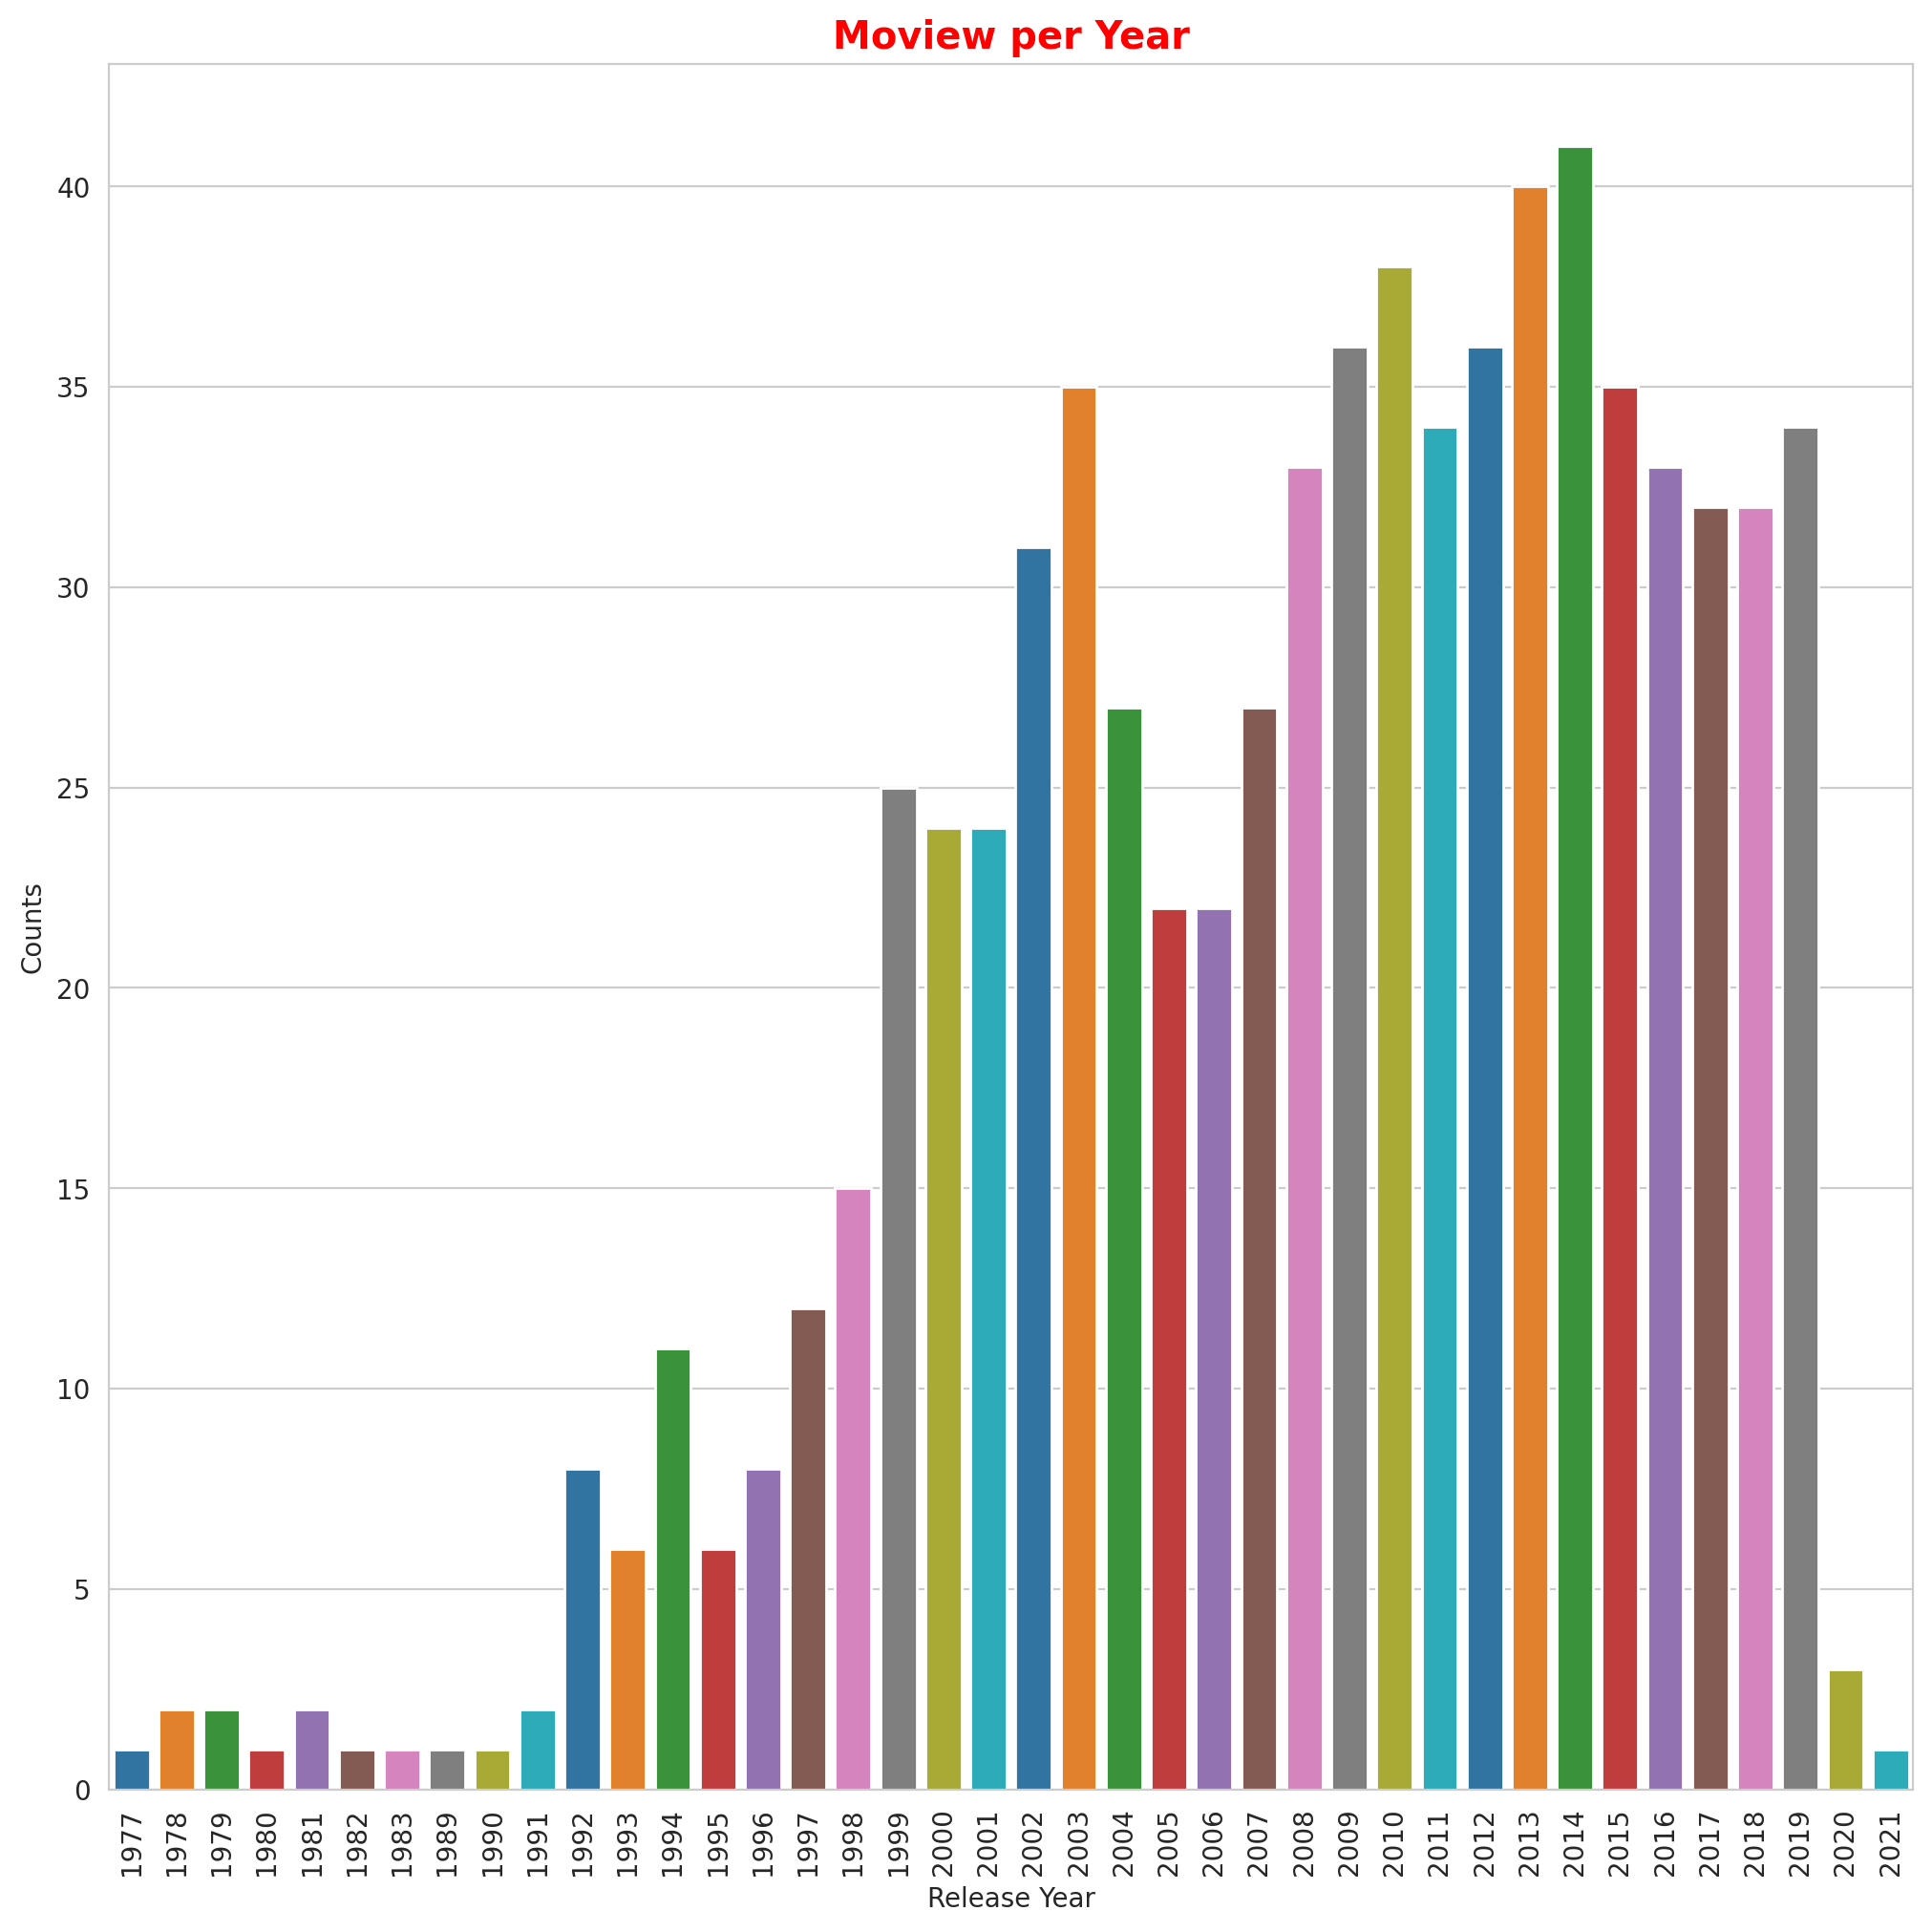

In [32]:
fig_WS_Month = plt.figure(num = 3, 
                        figsize = (10,10), 
                        dpi = 200, 
                        clear = True,
                        constrained_layout =  True
                    )

ax = sns.countplot(data = dt_frame, 
                   x = 'Release_Year', 
                   palette = 'tab10')

#Title
ax.set_title("Moview per Year", 
             loc='center' ,
             fontfamily = 'sans-serif',
             fontsize = 'x-large',
             fontweight = 'bold',
             color = 'red',
           
             )

#X- Axix
ax.set(xlabel="Release Year", ylabel = "Counts")
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=90)


plt.show()

**Observartion:**
1. In Year 2014 and 2013 we had higest number of moview that had made hit moview.
2. Due to Covid lockdown there was not movies release in year 2020 and 2021. 

**Question 4:** Which moview had the higest sales in year 2014?

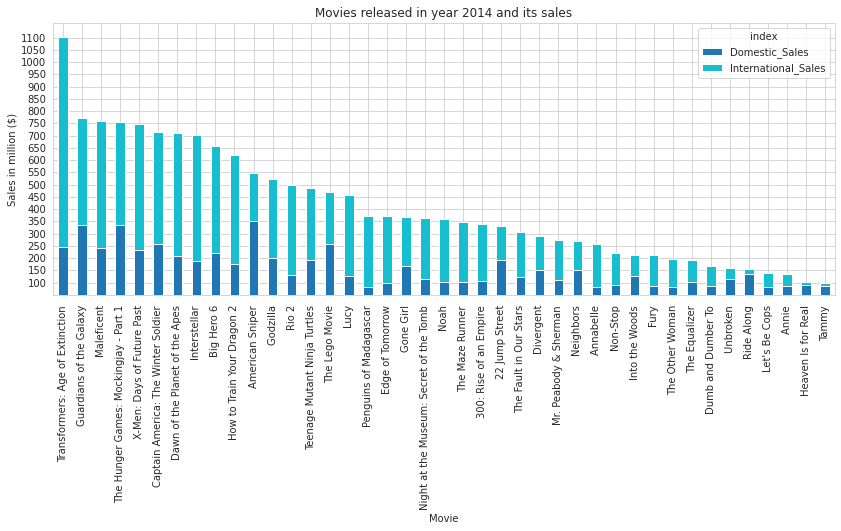

In [33]:
df_Movie_Released_On_2014 = dt_frame[dt_frame.Release_Year == 2014]
df_Movie_Released_On_2014 = df_Movie_Released_On_2014.sort_values(by = 'World_Sales', ascending = False)

ylabel = np.arange(100,1110,50)

ax = (df_Movie_Released_On_2014[['Title','Domestic_Sales','International_Sales']]).plot(
                                                                                            x = 'Title', 
                                                                                            kind = 'bar', 
                                                                                            stacked = True, 
                                                                                            color = ['tab:blue', 'tab:cyan'], 
                                                                                            width = 0.5 ,
                                                                                            figsize = (14,5),
                                                                                            title ="Movies released in year 2014 and its sales",
                                                                                            xlabel = "Movie",
                                                                                            yticks = ylabel,
                                                                                            ylabel = "Sales in million ($)",
                                                                                            ylim = 50,
                                                                                                                                                   
                                                                                        )

**Observation:**
1. Movie "Transformers: Age of Extinction" had maximum sales in year 2014. Highest sales came from the internationally  